# Practice notebook for multivariate analysis using NHANES data

This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data.  These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
sns.set_theme(rc={'figure.dpi':150,'figure.figsize':(6,4)})

da = pd.read_csv("nhanes_2015_2016.csv")
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

[Text(0.5, 0, 'First Diastolic BP'), Text(0, 0.5, 'Second Diastolic BP')]

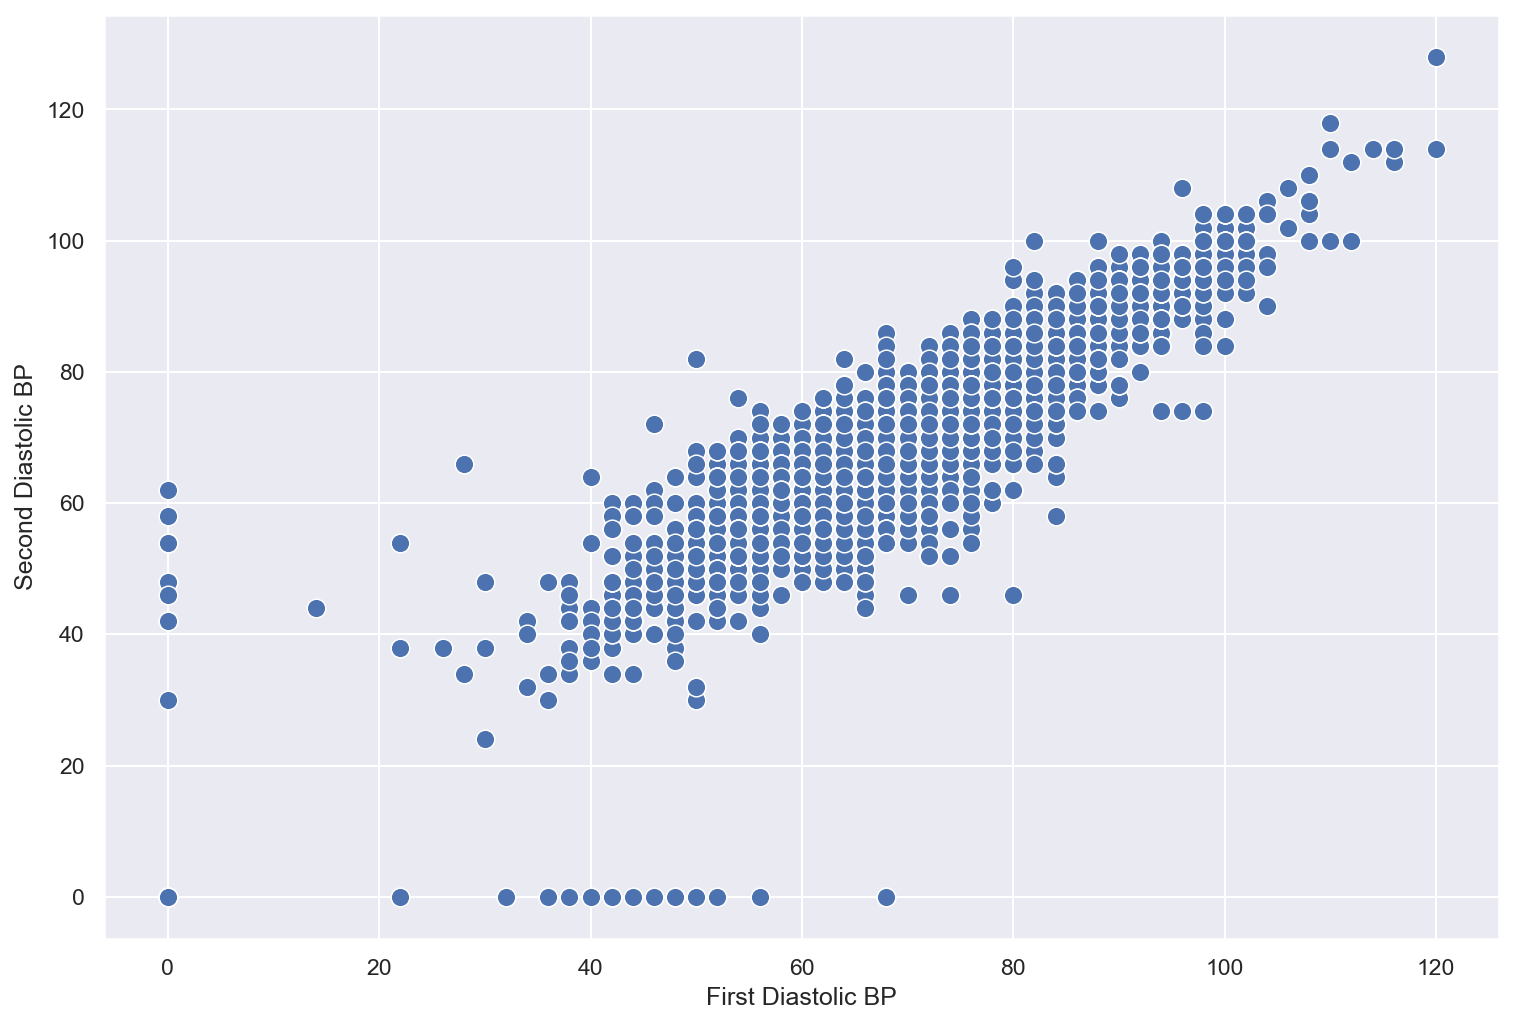

In [2]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = da, x = "BPXDI1", y = 'BPXDI2', s = 80).set(xlabel = 'First Diastolic BP', ylabel = 'Second Diastolic BP')

In [3]:
bp_data = da[['BPXSY1', 'BPXSY2', 'BPXDI1', 'BPXDI2']].corr()
bp_data

,BPXSY1,BPXSY2,BPXDI1,BPXDI2
BPXSY1,1.000000,0.962287,0.316531,0.277681
BPXSY2,0.962287,1.000000,0.329843,0.303847
BPXDI1,0.316531,0.329843,1.000000,0.884722
BPXDI2,0.277681,0.303847,0.884722,1.000000


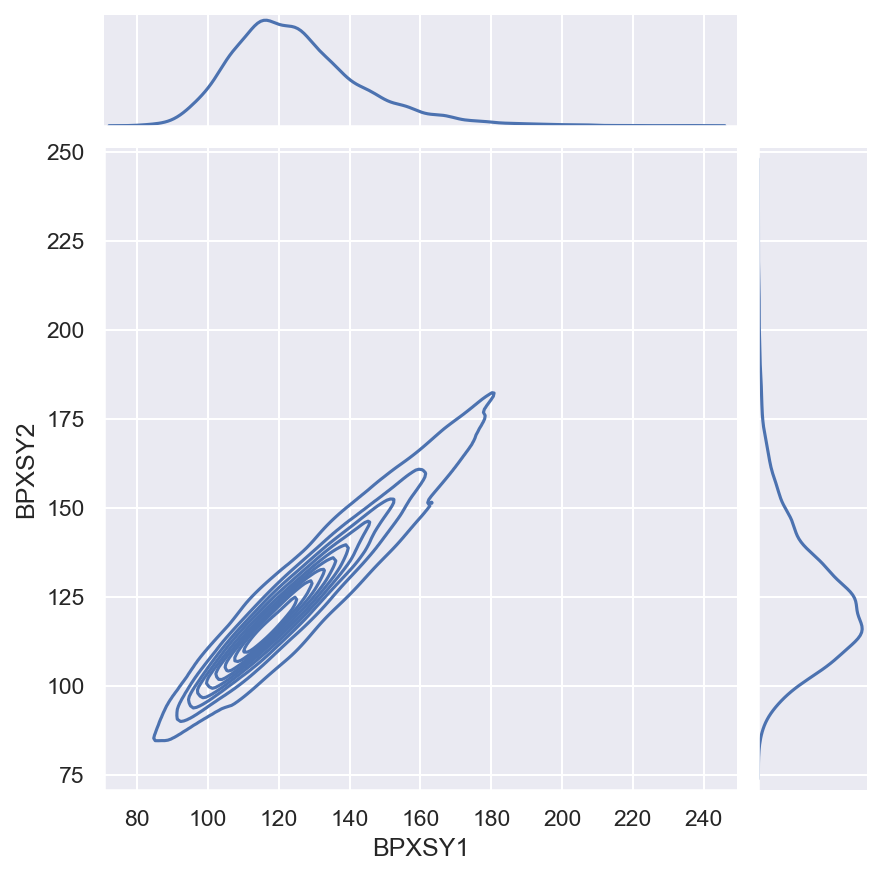

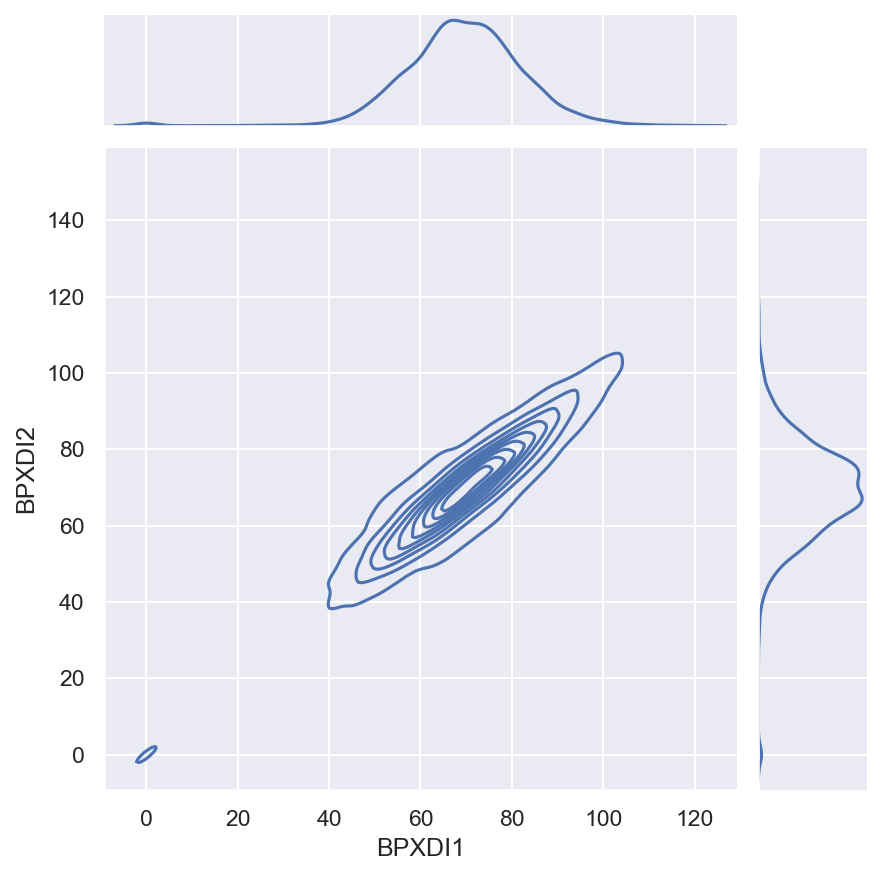

In [4]:
# Plot the first jointplot
sns.jointplot(x="BPXSY1", y="BPXSY2", kind='kde', data=da)

# Plot the second jointplot
sns.jointplot(x="BPXDI1", y="BPXDI2", kind='kde', data=da)

__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

> We can observe that the correlation coefficient between the first systolic (BPXSY1) and second systolic (BPXSY2) blood pressure measures is 0.962287. Similarly, the correlation coefficient between the first diastolic (BPXDI1) and second diastolic (BPXDI2) blood pressure measures is 0.884722.
> 
> Comparing these correlation coefficients, we can see that the correlation between repeated measurements of systolic blood pressure (0.962287) is higher than the correlation between repeated measurements of diastolic blood pressure (0.884722).
> 
> Therefore, the correlation between repeated measurements of systolic blood pressure is generally stronger compared to the correlation between repeated measurements of diastolic blood pressure.

__Q2a.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

>Looking into the 4x4 metrix, We can see that the correlation coefficient between the first systolic (BPXSY1) and first diastolic (BPXDI1) blood pressure measures is 0.316531, while the correlation coefficient between the second systolic (BPXSY2) and second diastolic (BPXDI2) blood pressure measures is 0.303847.
>
>Comparing these correlation coefficients, we can observe that the first systolic and first diastolic blood pressure measures have a slightly higher correlation (0.316531) compared to the second systolic and second diastolic blood pressure measures (0.303847). Therefore, the first systolic and first diastolic blood pressure measures are slightly more correlated than the second systolic and second diastolic blood pressure measures.

## Question 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

In [5]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"}) 

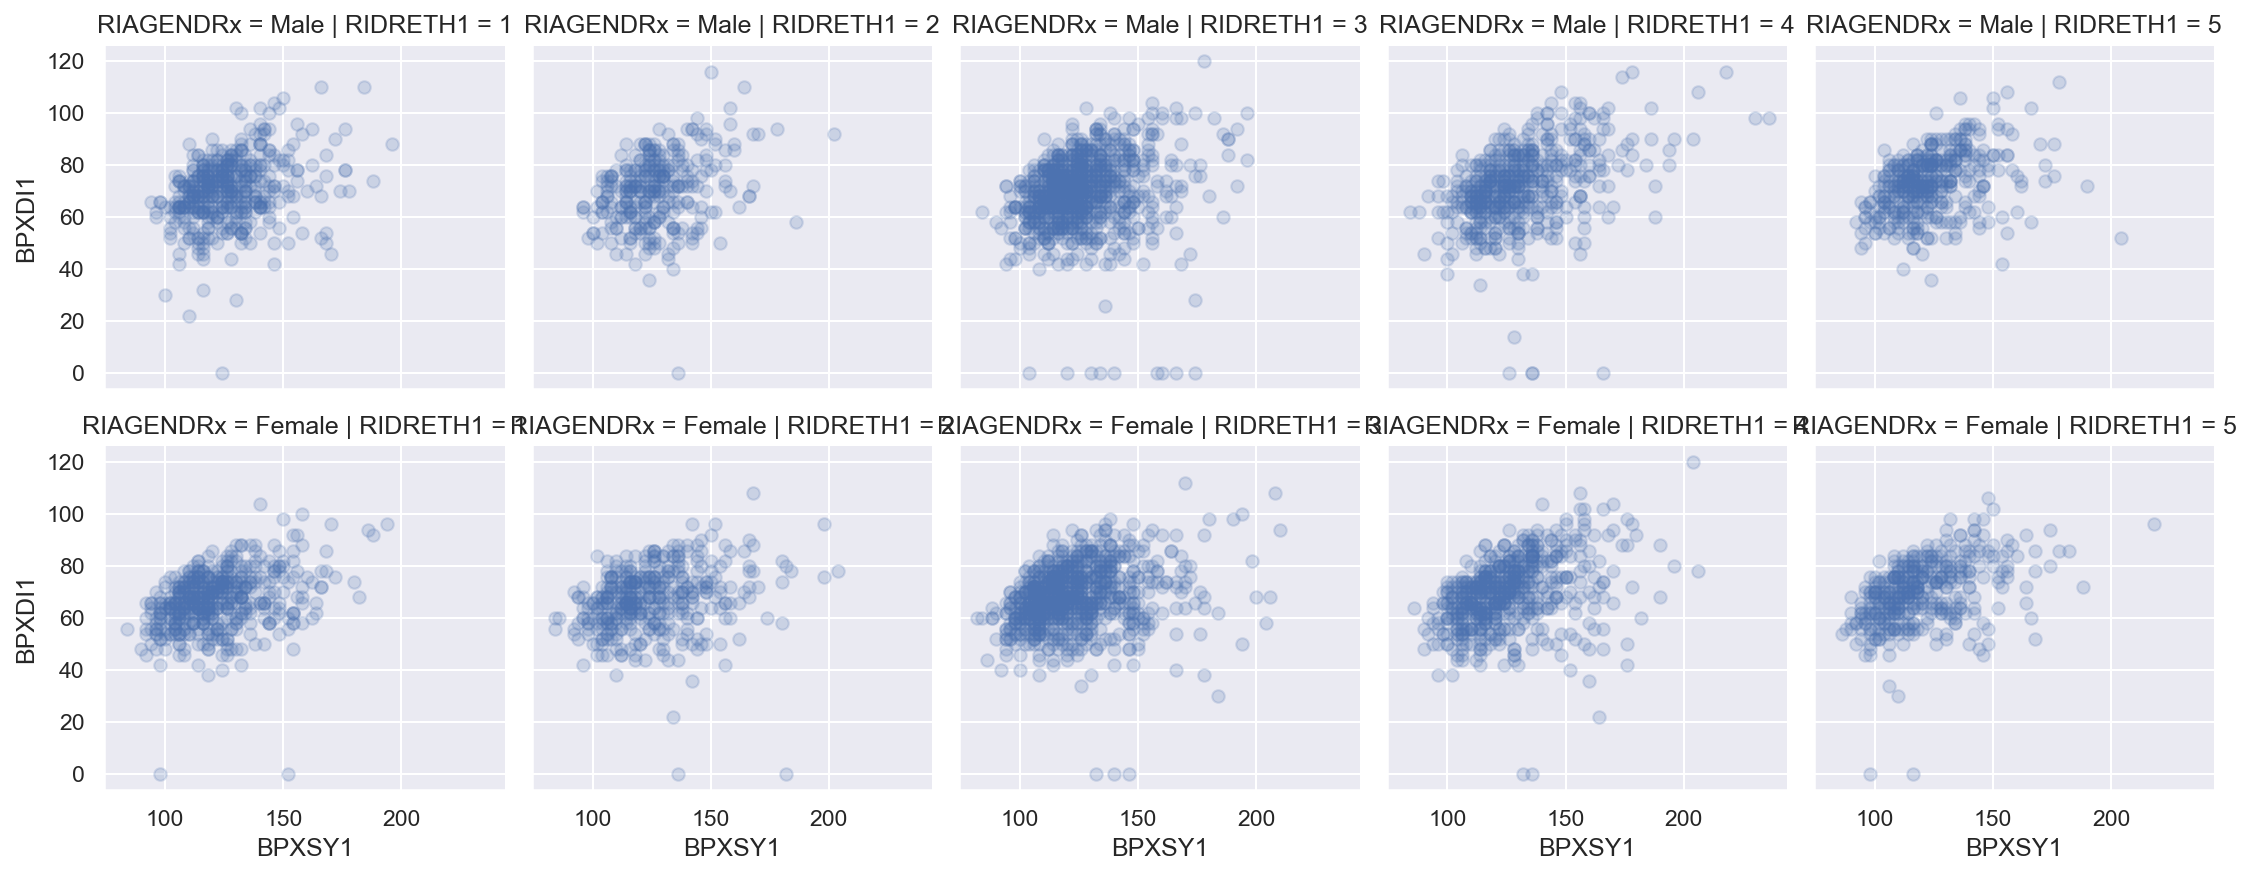

In [6]:
sns.FacetGrid(da, col="RIDRETH1", row="RIAGENDRx").map(plt.scatter, "BPXSY1", "BPXDI1", alpha=0.2).add_legend()

__Q2a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

> We can see that the realationship between the systolic blood pressure and the diastolic blood pressure is roughly similar among all ethnic groups and gender

## Question 3

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

In [7]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})

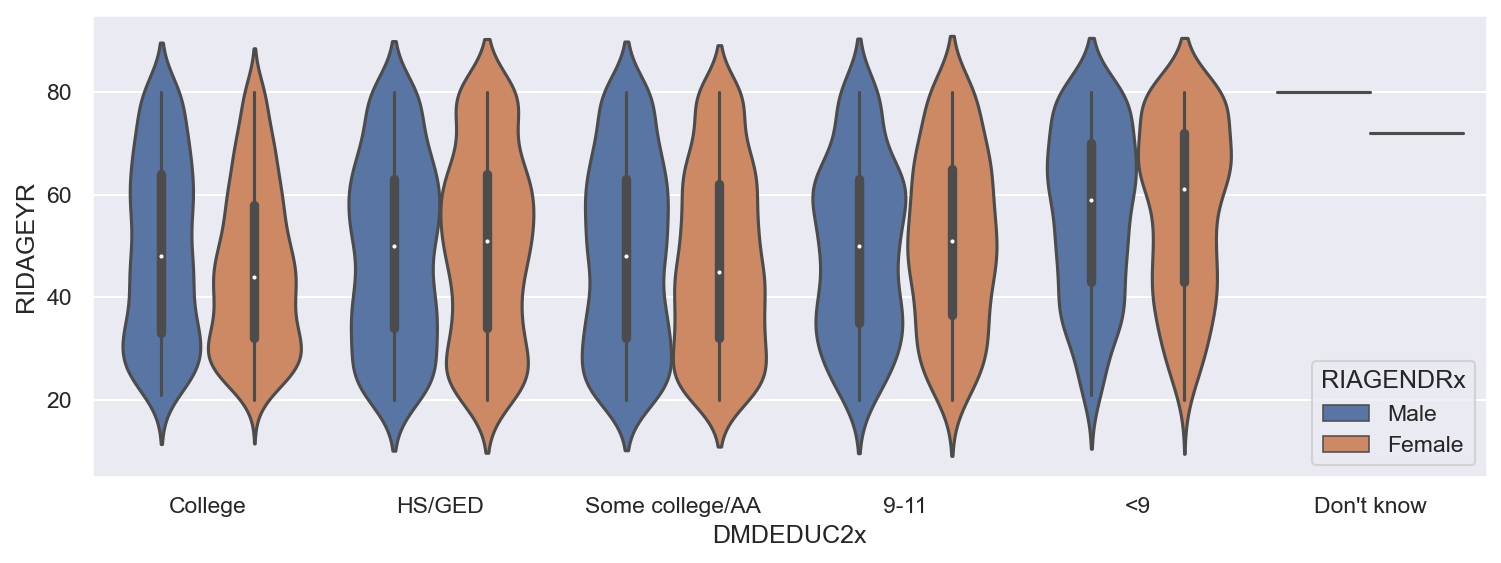

In [8]:
plt.figure(figsize=(12, 4))
a = sns.violinplot(x = da.DMDEDUC2x, y = da.RIDAGEYR, hue = da.RIAGENDRx)

__Q3a.__ Comment on any evident differences among the age distributions in the different demographic groups.

> The violin plot above shows that the age group for male and female with college degrees and some college/AA is right skewed whereas the age group for male and female with less than 9th grade education is left skewed. The data for HS/GED and 9-11 grade is symmetric or equally distributed.

## Question 4

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

<Axes: xlabel='agegroup', ylabel='BMXBMI'>

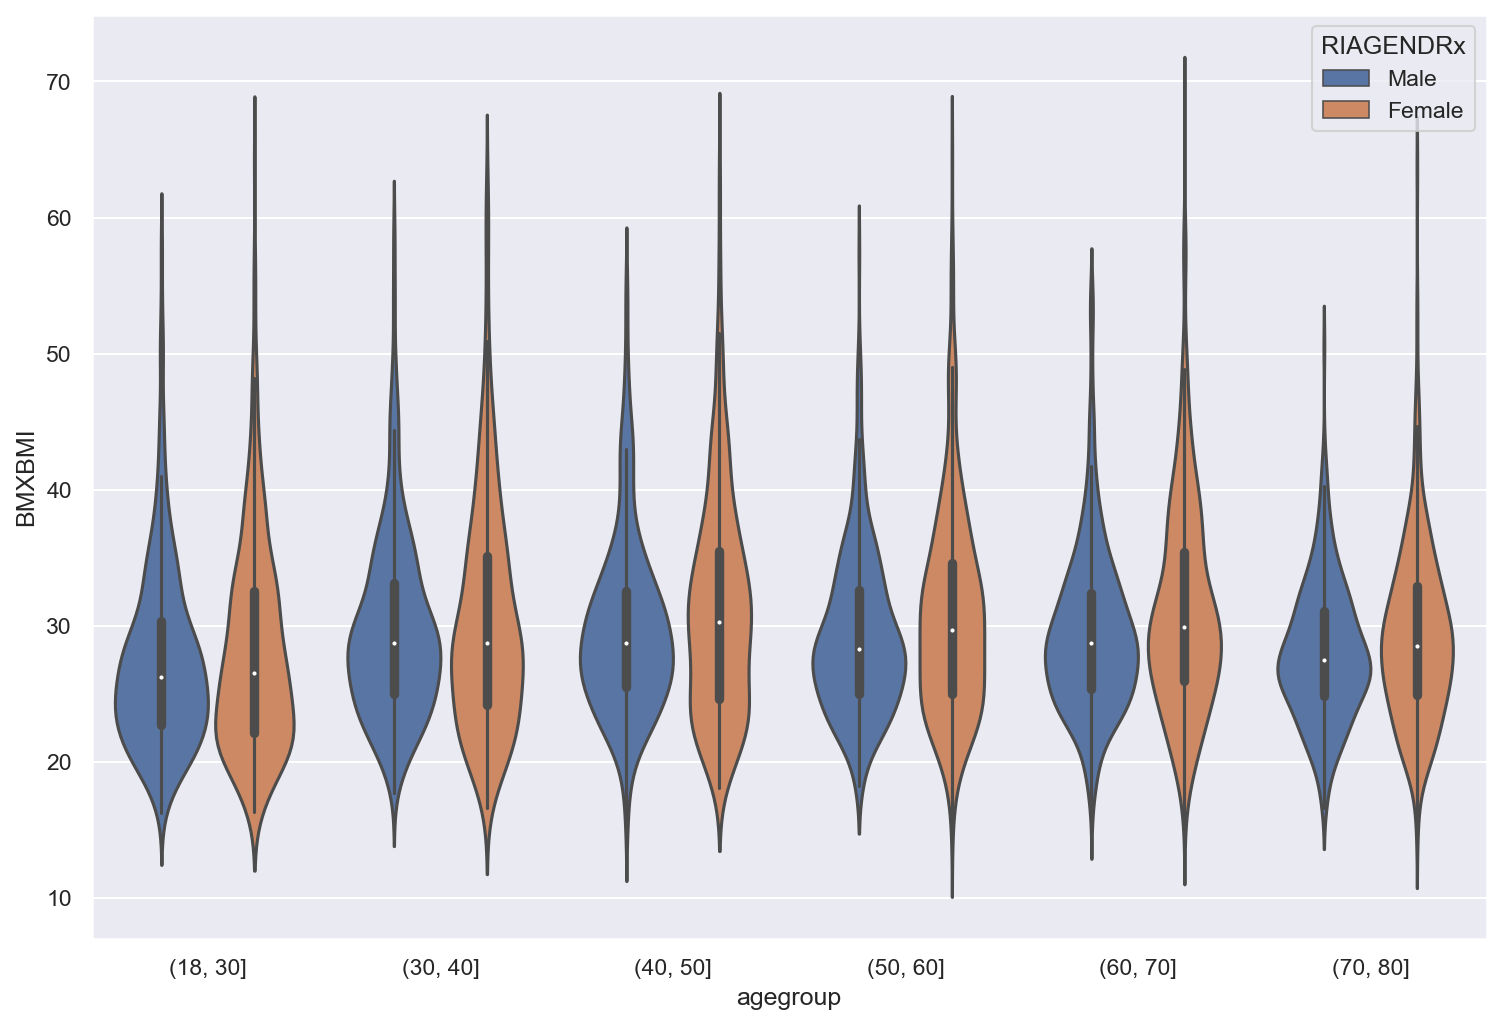

In [9]:
da["agegroup"] = pd.cut(da.RIDAGEYR, [18,30,40,50,60,70,80])
plt.figure(figsize = (12,8))
sns.violinplot(x = da.agegroup, y = da.BMXBMI, hue = da.RIAGENDRx )

__Q5a.__ Comment on the trends in BMI across the demographic groups.

> The BMI is right skewed for females at the lowest age group. As we increase the age, the BMI increases and becomes symmetrical. The BMI for large amount of makes is distributed close to the median.

## Question 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [10]:
da["RIDRETH1x"] = da.RIDRETH1.replace({1: "Mexican American", 2: "Other Hispanic", 3: "Non-Hispanic White", 
                                      4: "Non-Hispanic Black", 5: "Other Race - Including Multi-Racial"})
da["RIDRETH1x"].value_counts().sum()

5735

In [11]:
da["HIQ210x"] = da.HIQ210.replace({1: "Yes", 2: "No", 7: "Refused", 9: "Don't Know"})
da["HIQ210x"].value_counts().sum()

4732

In [12]:
da["HIQ210x"].fillna("Missing", inplace = True)
da["HIQ210x"].value_counts().sum()

5735

In [13]:
pd.crosstab(da.HIQ210x, da.RIDRETH1x).apply(lambda x: x/x.sum(), axis=0).round(3)

RIDRETH1x,Mexican American,Non-Hispanic Black,Non-Hispanic White,Other Hispanic,Other Race - Including Multi-Racial
HIQ210x,,,,,
Don't Know,0.003,0.001,0.001,0.000,0.002
Missing,0.338,0.152,0.104,0.233,0.118
No,0.568,0.755,0.835,0.668,0.808
Yes,0.091,0.092,0.060,0.099,0.072


__Q6a.__ Which ethnic group has the highest rate of being uninsured in the past year?

>Non-hispanic whites answered 'NO' the most compared to the total for the race. Therefore, Non-Hispanic whites has the highest rate of being uninsured.

>The majority of respondents from all racial/ethnic groups answered "No" to the question represented by HIQ210x.
>
>The proportion of respondents who answered "No" is highest among Non-Hispanic White individuals (83.5%), followed by Other Race - Including Multi-Racial (80.8%), Mexican American (56.8%), Other Hispanic (66.8%), and Non-Hispanic Black (75.5%).
>
>The proportion of respondents who answered "Yes" is relatively low across all racial/ethnic groups, ranging from 0.06% to 0.099%.
>
>The category "Missing" represents a significant proportion of responses, with Non-Hispanic Black individuals having the highest percentage (15.2%), followed by Other Race - Including Multi-Racial (11.8%), Non-Hispanic White (10.4%), Other Hispanic (23.3%), and Mexican American (33.8%).